#### in this notebook, we will prepare the dataset from Ophellia Venterulli's lab for compressive sensing/sparse recovery algorithms 

#### import the necessary files and modules 

In [1]:
import pandas as pd
import numpy as np
import cvxpy as cvx
import random
from scipy import stats
import sympy
import itertools
import os
pathn = os.getcwd()
import matplotlib.pyplot as plt
from sklearn import preprocessing
import itertools

#### import the dataset and choose only the data marked as no low reads and no contamination 

In [2]:
datam = pd.read_csv(r"C:\Users\shrey\microbial-ecology/datasets/Venturelli/2020_02_28_MasterDF.csv")
datamf = datam.T[3:68].T
no_cont_and_no_lowreads = datam[datam["Contamination?"]=="No"]
cleandata = no_cont_and_no_lowreads.copy()
no_cont_only = datam[datam["Contamination?"]!="Yes"]

##### the paper mentions that the pool is 25 species strong

In [4]:
species_data = pd.read_csv(r"C:\Users\shrey\microbial-ecology/datasets/Venturelli/species_used_list.csv")
sp_list_provided = species_data["Abbreviation"].values

#### but the master data has some 26 species, the species not used from the master data is "HB"

In [5]:
sp_list = list(datam.T.index[8:34])
list(set(sp_list) - set(species_data["Abbreviation"].values))

['HB']

#### note that the communities marked with the "Treatment" label = COMM6*(species_abbreviation) means that all species are present except the one mentioned

In [5]:
cleandata[cleandata["Treatment"]== "COMM6*AC"].T[8:34];

In [8]:
datamf["Contamination?"].unique()

array(['No', 'Yes', 'LowReads'], dtype=object)

In [7]:
no_cont_and_no_lowreads;

In [8]:
sp_list = list(datam.T.index[8:34])

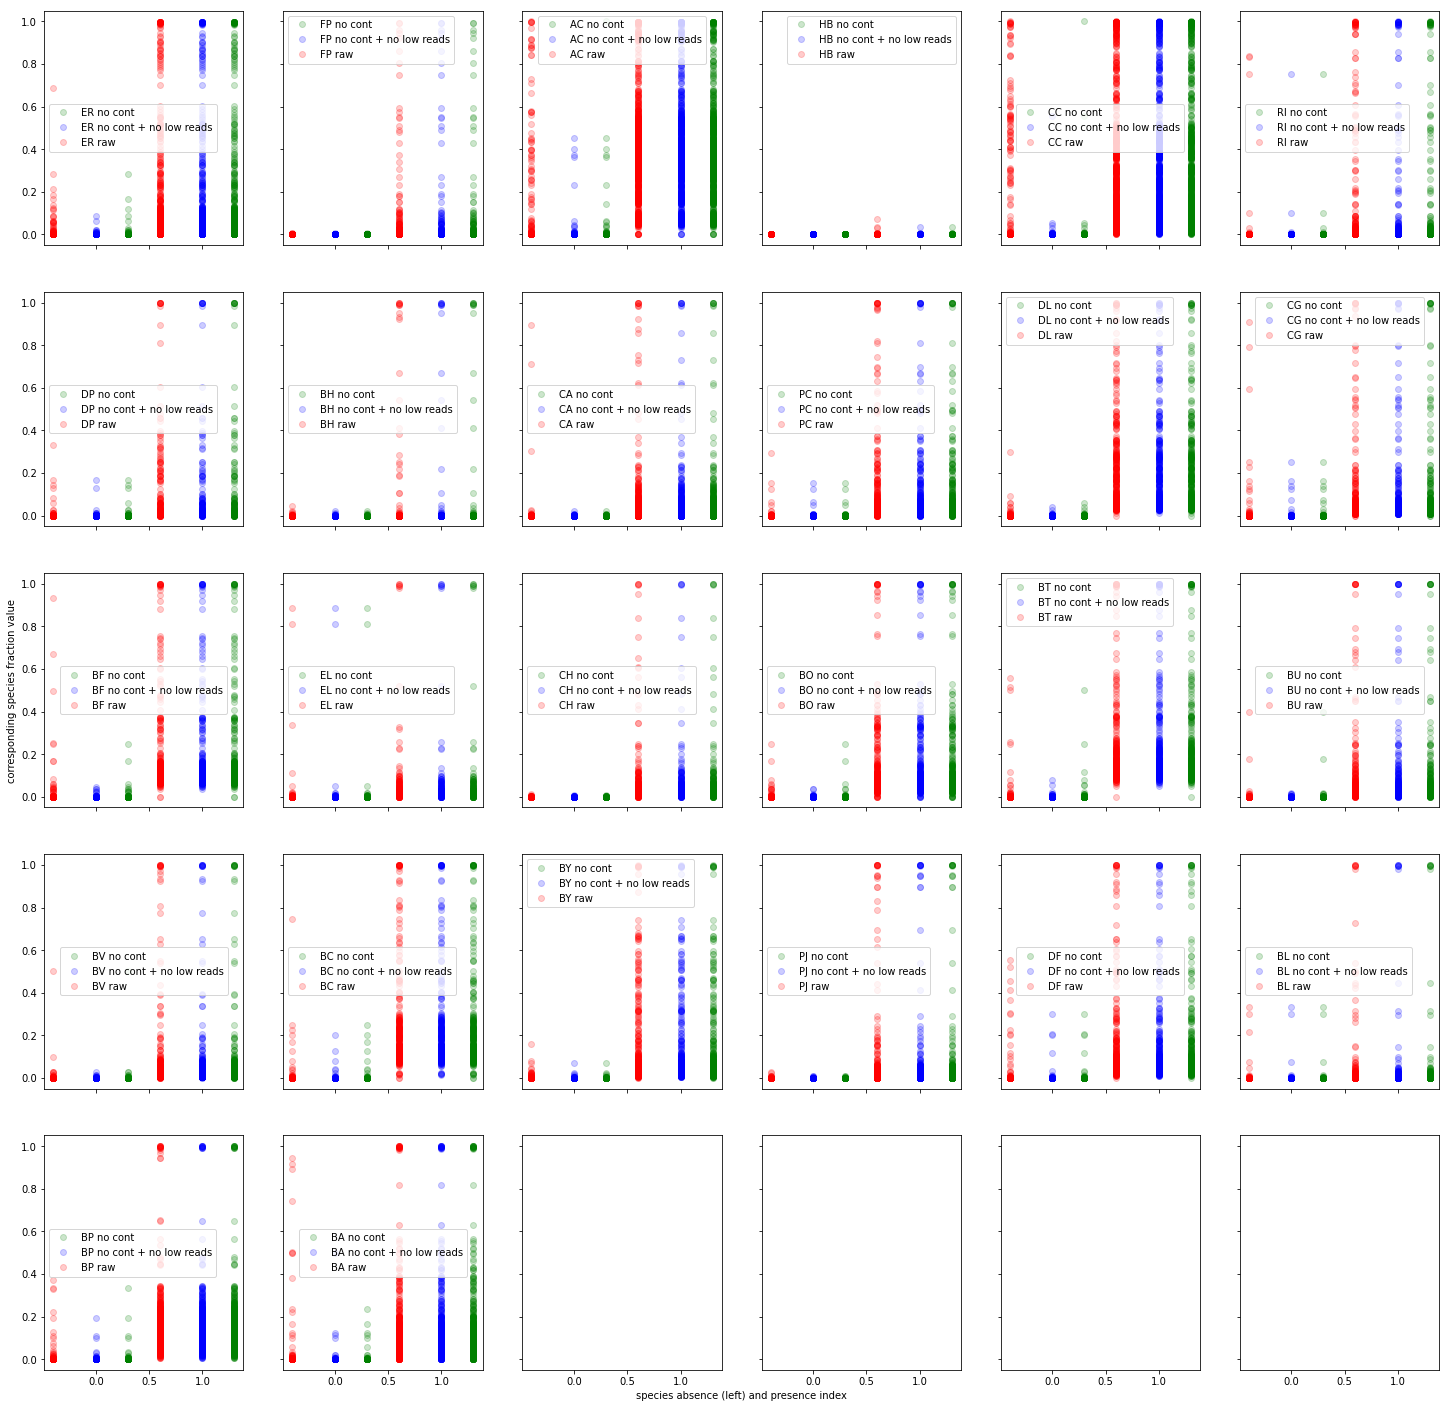

In [9]:
fig, axes = plt.subplots(5,6,figsize=(25,25),sharex=True, sharey=True)
for k in sp_list:
    j = sp_list.index(k)
    plt.subplot(5,6,j+1)
    plt.plot(no_cont_only[k].values+0.3, no_cont_only[str(k)+" Fraction"].values,"og",label= k +" no cont",alpha=0.2)
    plt.plot(no_cont_and_no_lowreads[k].values, no_cont_and_no_lowreads[str(k)+" Fraction"].values,"ob",label= k + " no cont + no low reads",alpha=0.2)
    plt.plot(datamf[k].values-0.4, datamf[str(k)+" Fraction"].values,"or",label= k +" raw",alpha=0.2)
    plt.legend()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("species absence (left) and presence index");
plt.ylabel("corresponding species fraction value");

In [9]:
#datam.drop(columns=["OD","Acetate","Lactate","Succinate","Butyrate","Total","pH","Sequenced","Unclassified","Peak30","Peak35"]);
datam.drop(columns=["OD","Acetate","Lactate","Succinate","Total","pH","Sequenced","Unclassified","Peak30","Peak35"]);

In [10]:
datam

,Unnamed: 0,Treatment,Rep,OD,Acetate,Butyrate,Lactate,Succinate,ER,FP,...,Total,Unclassified,Contamination?,Experiment No.,Sequenced,Peak30,Peak32,Peak35,Peak41,pH
0,0,ER,0.0,0.568967,4.4131,29.9305,0.0000,0.0000,1.0,0.0,...,6104.0,0.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
1,1,ER-FP,0.0,0.806767,0.0000,30.8609,48.1944,11.2766,1.0,1.0,...,4813.0,3.0,Yes,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
2,2,AC-ER,0.0,0.687167,0.0000,27.5914,46.7301,8.6136,1.0,0.0,...,6341.0,11.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
3,3,ER-HB,0.0,1.715767,2.9931,53.8812,31.7583,10.5907,1.0,0.0,...,7987.0,28.0,Yes,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
4,4,CC-ER,0.0,1.893367,24.6152,21.5316,71.5862,6.7671,1.0,0.0,...,5999.0,2.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,PC-DP-BL-CA-EL-FP-CH-AC-BH-ER-RI-CC,1.0,2.170000,25.1964,28.7848,31.1664,15.8973,1.0,1.0,...,13411.0,30.0,No,13.0,MiSeqOSV020,0.0000,65.4582,50.3161,6.1327,4.573613
1846,1846,PJ-BO-BY-BA-BP-FP-AC-ER-RI-CC-DF,1.0,2.156000,31.4282,33.8227,21.1842,5.8005,1.0,1.0,...,13366.0,53.0,No,13.0,MiSeqOSV020,0.0000,17.4555,38.5362,11.1391,4.000000
1847,1847,PJ-BO-BY-DP-BA-BP-FP-AC-ER-RI-CC-DF,1.0,2.037000,39.9758,27.7389,29.0274,5.1319,1.0,1.0,...,13896.0,69.0,No,13.0,MiSeqOSV020,0.0000,21.6116,42.2976,9.4327,4.648781
1848,1848,PJ-BV-BO-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF,1.0,2.172000,42.7095,32.8677,17.4055,17.6017,1.0,1.0,...,11889.0,67.0,No,13.0,MiSeqOSV020,0.0000,22.6875,37.4301,29.5037,5.234637


In [11]:
uqlist = datam["Treatment"].unique()
nuqlist = [i.replace('-','') for i in uqlist] 
sp_list_clean = cleandata.T[8:34].index.unique()

In [12]:
cleandata;

#### some species have blanks instead of 0 and 1, pandas reads these as NaNs, do any of the species have nans?

In [13]:
nan_list = [] 
for j in sp_list_clean:
    nan_list.append([j,cleandata[j].isnull().values.sum()])

In [14]:
pd.DataFrame(nan_list);

### HB had to be dropped I guess

In [15]:
### from the clean data, we will drop any and all treatments that have HB in them. 
cleandata25 = cleandata[cleandata["Treatment"].str.contains("HB")==False]

In [16]:
### We have some 586 unique communities, it seems 
len(cleandata25["Treatment"].unique());

#### let us also remove the treatment columns named COMMS but we will come back to this later 

In [17]:
cleandata25

,Unnamed: 0,Treatment,Rep,OD,Acetate,Butyrate,Lactate,Succinate,ER,FP,...,Total,Unclassified,Contamination?,Experiment No.,Sequenced,Peak30,Peak32,Peak35,Peak41,pH
0,0,ER,0.0,0.568967,4.4131,29.9305,0.0000,0.0000,1.0,0.0,...,6104.0,0.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
2,2,AC-ER,0.0,0.687167,0.0000,27.5914,46.7301,8.6136,1.0,0.0,...,6341.0,11.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
4,4,CC-ER,0.0,1.893367,24.6152,21.5316,71.5862,6.7671,1.0,0.0,...,5999.0,2.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
6,6,DP-ER,0.0,0.441167,29.0056,19.1492,38.7304,4.9461,1.0,0.0,...,5878.0,5.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
7,7,BH-ER,0.0,1.181767,50.1870,23.5439,50.5170,5.5618,1.0,0.0,...,5659.0,9.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,PC-DP-BL-CA-EL-FP-CH-AC-BH-ER-RI-CC,1.0,2.170000,25.1964,28.7848,31.1664,15.8973,1.0,1.0,...,13411.0,30.0,No,13.0,MiSeqOSV020,0.0000,65.4582,50.3161,6.1327,4.573613
1846,1846,PJ-BO-BY-BA-BP-FP-AC-ER-RI-CC-DF,1.0,2.156000,31.4282,33.8227,21.1842,5.8005,1.0,1.0,...,13366.0,53.0,No,13.0,MiSeqOSV020,0.0000,17.4555,38.5362,11.1391,4.000000
1847,1847,PJ-BO-BY-DP-BA-BP-FP-AC-ER-RI-CC-DF,1.0,2.037000,39.9758,27.7389,29.0274,5.1319,1.0,1.0,...,13896.0,69.0,No,13.0,MiSeqOSV020,0.0000,21.6116,42.2976,9.4327,4.648781
1848,1848,PJ-BV-BO-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF,1.0,2.172000,42.7095,32.8677,17.4055,17.6017,1.0,1.0,...,11889.0,67.0,No,13.0,MiSeqOSV020,0.0000,22.6875,37.4301,29.5037,5.234637


In [18]:
nocommsclean = cleandata25[cleandata25["Treatment"].str.contains("COMM")==False]

In [19]:
nocommsclean;

In [20]:
nocommsclean["Treatment"].values

array(['ER', 'AC-ER', 'CC-ER', ..., 'PJ-BO-BY-DP-BA-BP-FP-AC-ER-RI-CC-DF',
       'PJ-BV-BO-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF',
       'PJ-BV-BO-DP-BA-BP-CA-FP-CH-AC-CG-ER-RI-CC-DF'], dtype=object)

In [21]:
newlist = []
for x in nocommsclean["Treatment"].values:
    newlist.append(x.replace('-', ' '))

#### call a label encoder to convert treatment names to numbers (and then convert that to well indices)

In [23]:
newlist2 =[]
for i in range(len(newlist)):
    newlist2.append(newlist[i].split())

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
le.fit(sp_list_provided)
le.classes_

array(['AC', 'BA', 'BC', 'BF', 'BH', 'BL', 'BO', 'BP', 'BT', 'BU', 'BV',
       'BY', 'CA', 'CC', 'CG', 'CH', 'DF', 'DL', 'DP', 'EL', 'ER', 'FP',
       'PC', 'PJ', 'RI'], dtype=object)

In [26]:
list_present = [] 
for i in newlist2:
    list_present.append((le.transform(i)))

In [27]:
well_number = [] 
### for the communities we have, let us calculate the well index in case 
for i in list_present:
    m = len(i)
    summ = 0 
    for t in range(m):
        summ = summ + 2**(25-i[t]-1) 
    well_number.append(summ)      

In [28]:
nocommsclean["well number"] = well_number

C:\Users\shrey\AppData\Local\Temp/ipykernel_28632/2014674850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nocommsclean["well number"] = well_number


In [30]:
nocommsclean2 = nocommsclean.drop(columns=["Unclassified","Total","Peak30","Peak32","Peak35","Peak41","pH","Contamination?","Experiment No.","Sequenced","Acetate","Lactate","Succinate","HB","HB Fraction"])

#### some species which are not present in the list provided (are out of sample of the 25 species) are still present in the "Fraction" columns

In [31]:
errlist = list(set(['BA','CA','BT','BU',
      'PC','AC','BH','CC',
      'CG','ER','DP','EL',
      'BY','BF','CD','RI',
      'BP','BV','CH','DF',
      'CS','PJ','FP','EH',
      'EC','BC','BO','DL',
      'BL','B.cereus']) - set(sp_list_provided))

In [32]:
errlist

['CD', 'B.cereus', 'CS', 'EH', 'EC']

In [33]:
maxcont = [] 
for i in errlist:
    maxcont.append(nocommsclean2.index[nocommsclean2[str(i)+" Fraction"] == nocommsclean2[str(i) + " Fraction"].max()].tolist())

In [34]:
maxcont2 = [item for sublist in maxcont for item in sublist]

In [35]:
### is the sampled flagged as contaminated?
contcheck = [] 
for j in maxcont2:
    contcheck.append(nocommsclean.T[j]["Contamination?"])

In [36]:
maxlist = [] 
for i in errlist:
    maxlist.append(nocommsclean2[str(i) + " Fraction"].max())

In [37]:
err = pd.DataFrame(errlist)
err["max in rel abundance"] = maxlist

In [38]:
err

,0,max in rel abundance
0,CD,0.057471
1,B.cereus,0.011494
2,CS,0.005076
3,EH,0.000000
4,EC,0.038462


In [39]:
### we will just look at the relative abundances for the species provided 
sp_frac_list = []
for i in sp_list_provided:
    sp_frac_list.append(str(i)+" Fraction")

In [42]:
sp_frac_list;

In [43]:
mono_vals = [] 
for kk in sp_list_provided:
    mono_vals.append([nocommsclean[nocommsclean["Treatment"]==str(kk)][sp_frac_list][str(kk) + " Fraction"].mean(),kk])
pd.DataFrame(mono_vals)

,0,1
0,0.997715,PC
1,0.998298,PJ
2,0.998179,BV
3,0.998721,BF
4,0.997733,BO
5,0.996598,BT
6,0.998417,BC
7,0.994021,BY
8,0.998472,BU
9,0.997006,DP


In [44]:
final_list = [*sp_list_provided, *sp_frac_list]
final_list.append("well number")
final_list.append("OD")

In [45]:
nocommsclean2[final_list].T[25:50].sum();

In [46]:
nocommsclean2;

#### we will look at the absolute abundance in each of the cases
#### but for now we will skip this step, and only look at the relative abundance in each of the wells 

In [47]:
#for i in sp_frac_list:
#    nocommsclean2[i] = nocommsclean2[i]*nocommsclean2["OD"]

In [48]:
nocommsclean2[final_list];

In [49]:
nocommsclean3 = nocommsclean2.sort_values(by="well number")
df4 = nocommsclean3.drop(columns = ["B.cereus Fraction","EH Fraction","CD Fraction","CS Fraction","EC Fraction"])

In [50]:
uniquewells =  df4["well number"].unique()
uniquewells.shape

(550,)

In [54]:
df4[df4["well number"].isin(uniquewells)]

,Unnamed: 0,Treatment,Rep,OD,Butyrate,ER,FP,AC,CC,RI,...,BV Fraction,CH Fraction,DF Fraction,PJ Fraction,FP Fraction,BC Fraction,BO Fraction,DL Fraction,BL Fraction,well number
333,333,RI,0.0,0.410908,33.7250,0.0,0.0,0.0,0.0,1.0,...,0.000126,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000252,0.000000,1
363,363,RI,2.0,0.558708,31.4588,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1557,1557,RI,0.0,0.010500,0.0000,0.0,0.0,0.0,0.0,1.0,...,0.001096,0.0,0.001096,0.002193,0.000000,0.000000,0.000000,0.000000,0.000000,1
476,476,RI,0.0,1.243000,27.7467,0.0,0.0,0.0,0.0,1.0,...,0.000127,0.0,0.000255,0.000000,0.000000,0.000255,0.000127,0.000000,0.000000,1
477,477,RI,1.0,1.261000,35.0163,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000118,0.000000,0.000118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1802,PJ-BF-BT-BC-BY-BU-BL-BA-CA-FP-AC-CG-ER-RI-CC,1.0,2.190000,43.7484,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.0,0.000000,0.001929,0.002465,0.094202,0.000000,0.000000,0.009645,32095259
1370,1370,PC-PJ-BV-BF-BO-BC-BY-BU-BL-BA-BP-CA-EL-FP-AC-B...,0.0,2.838500,25.1700,1.0,1.0,1.0,1.0,1.0,...,0.010568,0.0,0.022677,0.007045,0.000661,0.101497,0.036107,0.218846,0.001541,33488319
1465,1465,PC-PJ-BV-BF-BO-BC-BY-BU-BL-BA-BP-CA-EL-FP-AC-B...,1.0,2.410500,31.8300,1.0,1.0,1.0,1.0,1.0,...,0.011186,0.0,0.030507,0.006023,0.000313,0.076502,0.021902,0.184215,0.000860,33488319
1369,1369,PC-PJ-BV-BF-BO-BC-BY-BU-DP-BL-BA-BP-CA-EL-FP-A...,0.0,2.591500,18.1600,1.0,1.0,1.0,1.0,1.0,...,0.016463,0.0,0.023171,0.014634,0.000407,0.076626,0.038415,0.166260,0.006504,33488383


In [64]:
abun_mean =[] 
abun_std = [] 
buty_mean = [] 
buty_std = [] 
for j in uniquewells:
    abun_mean.append(df4[df4["well number"]==j][sp_frac_list].mean().values)
    abun_std.append(df4[df4["well number"]==j][sp_frac_list].std().values)
    buty_mean.append(df4[df4["well number"]==j]["Butyrate"].mean())
    buty_std.append(df4[df4["well number"]==j]["Butyrate"].std())

In [56]:
df4[df4["well number"]==j][sp_frac_list]

,PC Fraction,PJ Fraction,BV Fraction,BF Fraction,BO Fraction,BT Fraction,BC Fraction,BY Fraction,BU Fraction,DP Fraction,...,FP Fraction,CH Fraction,AC Fraction,BH Fraction,CG Fraction,ER Fraction,RI Fraction,CC Fraction,DL Fraction,DF Fraction
1369,0.003455,0.014634,0.016463,0.067683,0.038415,0.000203,0.076626,0.018699,0.008537,0.001423,...,0.000407,0.0,0.224797,0.000000,0.014228,0.032520,0.000203,0.044919,0.166260,0.023171
1464,0.002964,0.012336,0.012095,0.064883,0.024271,0.000160,0.070170,0.014178,0.007049,0.000641,...,0.000160,0.0,0.265219,0.000401,0.014899,0.032121,0.000080,0.029558,0.184076,0.024992


In [65]:
pa_mean = []
for j in uniquewells:
    pa_mean.append(df4[df4["well number"]==j][sp_list_provided].mean().values)

In [66]:
pa_nocomm = pd.DataFrame(pa_mean)

In [67]:
pa_nocomm["well number"] = uniquewells
pa_nocomm

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,well number
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,31263325
546,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,31575097
547,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,32095259
548,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33488319


In [54]:
df4[df4["well number"]==8][sp_frac_list]

,PC Fraction,PJ Fraction,BV Fraction,BF Fraction,BO Fraction,BT Fraction,BC Fraction,BY Fraction,BU Fraction,DP Fraction,...,FP Fraction,CH Fraction,AC Fraction,BH Fraction,CG Fraction,ER Fraction,RI Fraction,CC Fraction,DL Fraction,DF Fraction
473,0.000325,0.000000,0.000325,0.000000,0.000000,0.000649,0.000325,0.000000,0.000325,0.127922,...,0.113636,0.000000,0.000974,0.000000,0.000000,0.000974,0.751948,0.001299,0.000325,0.000000
213,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.127660,0.000000,0.000000,0.000000,...,0.595745,0.000000,0.042553,0.021277,0.000000,0.085106,0.000000,0.000000,0.042553,0.000000
268,0.007042,0.007042,0.000000,0.000000,0.007042,0.021127,0.007042,0.000000,0.014085,0.000000,...,0.007042,0.000000,0.401408,0.000000,0.253521,0.021127,0.007042,0.000000,0.000000,0.204225
269,0.062147,0.000000,0.011299,0.000000,0.011299,0.005650,0.005650,0.016949,0.000000,0.000000,...,0.271186,0.000000,0.361582,0.011299,0.073446,0.016949,0.011299,0.005650,0.005650,0.005650
270,0.151899,0.000000,0.000000,0.043728,0.004603,0.002301,0.004603,0.006904,0.000000,0.000000,...,0.154200,0.000000,0.375144,0.000000,0.164557,0.019563,0.000000,0.002301,0.000000,0.032221
271,0.048403,0.000000,0.012773,0.034958,0.010084,0.014118,0.001008,0.001008,0.003025,0.009076,...,0.051429,0.000000,0.454454,0.001681,0.029244,0.007059,0.000336,0.000000,0.000000,0.298487
571,0.000000,0.000000,0.004608,0.000000,0.000000,0.004608,0.078341,0.000000,0.000000,0.000000,...,0.861751,0.004608,0.018433,0.000000,0.004608,0.009217,0.000000,0.000000,0.000000,0.000000
892,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,...,0.804598,0.000000,0.034483,0.000000,0.000000,0.011494,0.000000,0.045977,0.000000,0.000000
1650,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.000000,0.000000,0.008850,...,0.946903,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1555,0.005076,0.005076,0.000000,0.000000,0.000000,0.005076,0.005076,0.000000,0.015228,0.000000,...,0.923858,0.005076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025381,0.000000


In [54]:
#pd.to_pickle(pa_nocomm,"OV_presence_absence.pkl")
pd.to_pickle(pa_nocomm,"OV-pa-with-wells.pkl")

import time 
startt = time.time()
dim_red = [] 
iterable = np.arange(0,25,1)
for r in range(4,7):
    listl =  list(itertools.combinations(iterable,r))
    for kk in listl:
        m = len(kk)
        inlist = []
        for x in range(m):
            inlist.append(set(pa_nocomm[pa_nocomm[kk[x]]==0.0].index.values))
        u = set.intersection(*inlist)
        dim_red.append([len(u),kk])
entime = time.time() - startt    

In [55]:
#pd.to_pickle(pdf,"pa-values-nocomm-backgroundcheck.pkl")

In [56]:
#length = []
#for i in range(len(pdf)):
#    length.append(len(pdf.iloc[i][1]))

In [57]:
#pdf["length"] = length

In [55]:
summ = 0  
for i in range(25):
    summ = summ + 2**i

In [56]:
wellleaveone = [] 
for i in range(25):
    wellleaveone.append(summ - 2**i)

In [57]:
uniquewellsl = list(uniquewells)

In [58]:
uniquewellsl.append(summ)

In [59]:
for xx in wellleaveone :
    uniquewellsl.append(xx)

In [60]:
pd.to_pickle(pd.DataFrame(list(set(uniquewellsl))).sort_values(by=0)[0].unique(),"all-wells-clark-venturelli.pkl")

In [61]:
abundances =  pd.DataFrame(abun_mean)
abundances["well index"] = uniquewells

In [62]:
abundances;

#### we will set the abundances to 0 if the species was indeed (Boolean) absent at the start 

In [63]:
abun_mean_0 =[] 
abun_std_0 = []
epiordernocomms = [] 
for j in uniquewells:
    Nf =  df4[df4["well number"]==j][sp_frac_list]
    N0 = df4[df4["well number"]==j][sp_list_provided]
    epiordernocomms.append(int(N0.iloc[0].sum()))
    N0.columns = sp_frac_list
    Nf[N0<1.0]=0
    abun_mean_0.append(Nf.mean().values)
    abun_std_0.append(Nf.std().values)

In [64]:
epiorder = pd.DataFrame(epiordernocomms)
epiorder["well index"] = uniquewells

In [65]:
abundances0 =  pd.DataFrame(abun_mean_0)
abundances0["well index"] = uniquewells

In [66]:
abundances0;

In [70]:
#set(wellssampled).difference(set(pd.read_pickle("steadystate_OV.pkl")["well index"].values))

In [67]:
abundances0.index = abundances0["well index"]

In [68]:
abundances0

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,well index
well index,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.977078,0.000000,0.000000,0.000000,1
2,0.000000,0.998298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.847052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.149664,0.000000,0.000000,0.000000,3
4,0.997715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
5,0.730089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.269292,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31263325,0.156407,0.000000,0.000000,0.000000,0.076094,0.133831,0.147084,0.000000,0.000000,0.001203,...,0.012301,0.277502,0.000264,0.000000,0.032079,0.003278,0.058951,0.000000,0.000000,31263325
31575097,0.000000,0.000000,0.021153,0.097413,0.000000,0.176705,0.125064,0.000000,0.007707,0.000000,...,0.000000,0.244604,0.000000,0.069015,0.006770,0.002727,0.048355,0.000000,0.000000,31575097
32095259,0.000000,0.001288,0.000000,0.067976,0.000000,0.119604,0.090041,0.022124,0.008953,0.000000,...,0.000000,0.350552,0.000000,0.057316,0.007441,0.002993,0.079082,0.000000,0.000000,32095259


In [73]:
pd.to_pickle(abundances0,"steadystate-rel-OV-nocomms.pkl")

In [2]:
import pandas as pd

In [70]:
len(uniquewellsl)

576

In [71]:
cleandata25[cleandata25["Treatment"].str.contains("COMM")==True]["Treatment"].unique()

array(['COMM3', 'COMM6', 'COMM6*ER', 'COMM6*FP', 'COMM6*RI', 'COMM6*DP',
       'COMM6*BH', 'COMM6*CA', 'COMM6*PC', 'COMM6*PJ', 'COMM6*AC',
       'COMM6*CC', 'COMM6*BA', 'COMM6*BP', 'COMM6*DL', 'COMM6*CG',
       'COMM6*BF', 'COMM6*BO', 'COMM6*BT', 'COMM6*BU', 'COMM6*BV',
       'COMM6*BC', 'COMM6*BY', 'COMM6*DF', 'COMM6*BL', 'COMM6*CH',
       'COMM6*EL', 'COMM7', 'COMM8'], dtype=object)

In [72]:
speciesindex = ['AC', 'BA', 'BC', 'BF', 'BH', 'BL', 'BO', 'BP', 'BT', 'BU', 'BV',
       'BY', 'CA', 'CC', 'CG', 'CH', 'DF', 'DL', 'DP', 'EL', 'ER', 'FP',
       'PC', 'PJ', 'RI']

In [73]:
speciesindex.reverse()

In [74]:
speciesindex;
valsp = [] 
for kk in sp_list_provided:
    valsp.append(speciesindex.index(kk))

In [75]:
commsonlydata = cleandata25[cleandata25["Treatment"].str.contains("COMM")==True]
commsonlydata

,Unnamed: 0,Treatment,Rep,OD,Acetate,Butyrate,Lactate,Succinate,ER,FP,...,Total,Unclassified,Contamination?,Experiment No.,Sequenced,Peak30,Peak32,Peak35,Peak41,pH
90,90,COMM3,0.0,1.750367,44.8430,30.4309,40.2519,9.9867,1.0,1.0,...,6935.0,46.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
91,91,COMM3,1.0,1.765367,41.4997,26.8056,40.1386,8.1597,1.0,1.0,...,5673.0,62.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
92,92,COMM3,2.0,1.701967,44.6311,29.1805,36.5788,9.4726,1.0,1.0,...,5482.0,37.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
183,183,COMM3,3.0,1.770967,0.0000,31.6831,11.2228,35.1139,1.0,1.0,...,4022.0,41.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
184,184,COMM3,4.0,1.735767,45.2601,30.5483,34.0074,6.7858,1.0,1.0,...,4904.0,37.0,No,2.0,MiSeqOSV003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1653,COMM6*AC,1.0,2.325500,37.4785,1.7269,44.1650,21.6568,1.0,1.0,...,7091.0,72.0,No,12.0,MiSeqOSV014,9.5367,98.2289,33.6130,27.0009,4.954427
1742,1742,COMM6,0.0,2.333000,38.2448,25.3997,35.0199,17.1612,1.0,1.0,...,10994.0,34.0,No,13.0,MiSeqOSV020,2.2249,133.1021,23.6399,22.4217,4.736153
1743,1743,COMM6*DP,0.0,2.435000,28.6293,33.8612,14.6755,15.4032,1.0,1.0,...,14406.0,74.0,No,13.0,MiSeqOSV020,2.0062,138.2247,38.6083,22.5744,5.771834
1837,1837,COMM6,1.0,2.091000,35.6483,26.7691,30.2518,14.1765,1.0,1.0,...,12060.0,55.0,No,13.0,MiSeqOSV020,4.0024,133.7671,34.5138,23.0025,4.862992


In [76]:
uniqcomms = commsonlydata["Treatment"].unique()

In [77]:
commswellno = [] 
for k in uniqcomms:
    wellscalc = pd.DataFrame(commsonlydata[commsonlydata["Treatment"]==k][sp_list_provided].iloc[0])
    wellscalc["value"] = valsp
    commswellno.append(int((wellscalc.T.iloc[0]*(2**(wellscalc.T.iloc[1]))).sum()))

In [78]:
commswellno;

In [79]:
### the label COMM3 and COMM6 is the same
commsonlydata[commsonlydata["Treatment"]=="COMM6"][sp_list_provided].T.sum()

366     25.0
368     25.0
369     25.0
1042    25.0
1229    25.0
1367    25.0
1742    25.0
1837    25.0
dtype: float64

In [80]:
uniqcomms

array(['COMM3', 'COMM6', 'COMM6*ER', 'COMM6*FP', 'COMM6*RI', 'COMM6*DP',
       'COMM6*BH', 'COMM6*CA', 'COMM6*PC', 'COMM6*PJ', 'COMM6*AC',
       'COMM6*CC', 'COMM6*BA', 'COMM6*BP', 'COMM6*DL', 'COMM6*CG',
       'COMM6*BF', 'COMM6*BO', 'COMM6*BT', 'COMM6*BU', 'COMM6*BV',
       'COMM6*BC', 'COMM6*BY', 'COMM6*DF', 'COMM6*BL', 'COMM6*CH',
       'COMM6*EL', 'COMM7', 'COMM8'], dtype=object)

In [81]:
final_list = [*sp_list_provided, *sp_frac_list]
final_list.append("OD")
final_list.append("Treatment")
commsonlydata[final_list]

,PC,PJ,BV,BF,BO,BT,BC,BY,BU,DP,...,AC Fraction,BH Fraction,CG Fraction,ER Fraction,RI Fraction,CC Fraction,DL Fraction,DF Fraction,OD,Treatment
90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.241544,0.000000,0.010306,0.002758,0.000145,0.067063,0.248512,0.017274,1.750367,COMM3
91,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.217965,0.000000,0.010515,0.000891,0.000178,0.059348,0.277847,0.019783,1.765367,COMM3
92,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.193021,0.000184,0.006795,0.000735,0.000000,0.066850,0.354086,0.020018,1.701967,COMM3
183,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.217031,0.000000,0.007787,0.001005,0.007536,0.077619,0.269781,0.015825,1.770967,COMM3
184,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.205054,0.000000,0.008424,0.000411,0.001027,0.068009,0.293405,0.019519,1.735767,COMM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000142,0.011398,0.002707,0.002564,0.105571,0.020231,0.030489,2.325500,COMM6*AC
1742,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.189051,0.000274,0.020529,0.009033,0.001916,0.009580,0.217336,0.042609,2.333000,COMM6
1743,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.255303,0.000140,0.006070,0.006210,0.003279,0.010117,0.225719,0.055331,2.435000,COMM6*DP
1837,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.143524,0.000083,0.012995,0.006747,0.002416,0.007830,0.307289,0.050646,2.091000,COMM6


In [82]:
#for i in sp_frac_list:
#    commsonlydata[i] = commsonlydata[i]*commsonlydata["OD"]

In [83]:
commsonlydata[final_list]

,PC,PJ,BV,BF,BO,BT,BC,BY,BU,DP,...,AC Fraction,BH Fraction,CG Fraction,ER Fraction,RI Fraction,CC Fraction,DL Fraction,DF Fraction,OD,Treatment
90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.241544,0.000000,0.010306,0.002758,0.000145,0.067063,0.248512,0.017274,1.750367,COMM3
91,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.217965,0.000000,0.010515,0.000891,0.000178,0.059348,0.277847,0.019783,1.765367,COMM3
92,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.193021,0.000184,0.006795,0.000735,0.000000,0.066850,0.354086,0.020018,1.701967,COMM3
183,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.217031,0.000000,0.007787,0.001005,0.007536,0.077619,0.269781,0.015825,1.770967,COMM3
184,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.205054,0.000000,0.008424,0.000411,0.001027,0.068009,0.293405,0.019519,1.735767,COMM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000142,0.011398,0.002707,0.002564,0.105571,0.020231,0.030489,2.325500,COMM6*AC
1742,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.189051,0.000274,0.020529,0.009033,0.001916,0.009580,0.217336,0.042609,2.333000,COMM6
1743,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.255303,0.000140,0.006070,0.006210,0.003279,0.010117,0.225719,0.055331,2.435000,COMM6*DP
1837,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.143524,0.000083,0.012995,0.006747,0.002416,0.007830,0.307289,0.050646,2.091000,COMM6


In [84]:
abun_meancomm0 =[] 
abun_stdcomm0 = [] 
epiordercommsonly = []
for j in uniqcomms:
    Nf =  commsonlydata[commsonlydata["Treatment"]==j][sp_frac_list]
    N0 = commsonlydata[commsonlydata["Treatment"]==j][sp_list_provided]
    epiordercommsonly.append(int(N0.iloc[0].sum()))
    N0.columns = sp_frac_list
    Nf[N0<1.0]=0
    abun_meancomm0.append(Nf.mean().values)
    abun_stdcomm0.append(Nf.std().values)

In [85]:
abundancecomm =  pd.DataFrame(abun_meancomm0)
commswellno_int= [int(x) for x in commswellno]
abundancecomm["well index"] = commswellno_int

In [86]:
epiordercommsonlydf = pd.DataFrame(epiordercommsonly)
epiordercommsonlydf["well index"] = commswellno_int

In [87]:
pa_comm = [] 
for j in uniqcomms:
      pa_comm.append(commsonlydata[commsonlydata["Treatment"]==j][sp_list_provided].mean().values)

In [89]:
sp_excl = [0,1,4,8,12,13,14,23,24]
sp_all = np.arange(0,25,1)
sp_incl = list(set(sp_all).difference(set(sp_excl)))
sp_list_provided[sp_incl]

array(['BV', 'BF', 'BT', 'BC', 'BY', 'DP', 'BL', 'BA', 'FP', 'CH', 'AC',
       'BH', 'CG', 'ER', 'RI', 'CC'], dtype=object)

In [90]:
abundancecomm.index = abundancecomm["well index"]

In [91]:
abundancecomm0 = abundancecomm[1:]

In [92]:
abundances0

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,well index
well index,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.977078,0.000000,0.000000,0.000000,1
2,0.000000,0.998298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.847052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.149664,0.000000,0.000000,0.000000,3
4,0.997715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
5,0.730089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.269292,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31263325,0.156407,0.000000,0.000000,0.000000,0.076094,0.133831,0.147084,0.000000,0.000000,0.001203,...,0.012301,0.277502,0.000264,0.000000,0.032079,0.003278,0.058951,0.000000,0.000000,31263325
31575097,0.000000,0.000000,0.021153,0.097413,0.000000,0.176705,0.125064,0.000000,0.007707,0.000000,...,0.000000,0.244604,0.000000,0.069015,0.006770,0.002727,0.048355,0.000000,0.000000,31575097
32095259,0.000000,0.001288,0.000000,0.067976,0.000000,0.119604,0.090041,0.022124,0.008953,0.000000,...,0.000000,0.350552,0.000000,0.057316,0.007441,0.002993,0.079082,0.000000,0.000000,32095259


In [94]:
frames = [abundances0,abundancecomm0]

result = pd.concat(frames)

In [95]:
meandf = pd.DataFrame(result.T[:25].T.sum())
meandf["mean"] = result.T[:25].T.mean().values
meandf["std"] = result.T[:25].T.std().values
meandf
pd.to_pickle(meandf,"OV-rel-abun-wells.pkl")

In [96]:
meandf

,0,mean,std
0,14.658619,0.025361,0.094705
1,9.038228,0.015637,0.082507
2,10.316427,0.017848,0.083424
3,22.087515,0.038214,0.117358
4,19.999658,0.034601,0.099591
5,26.190703,0.045313,0.124691
6,31.199962,0.053979,0.139376
7,18.811816,0.032546,0.104846
8,10.801606,0.018688,0.083024
9,6.666094,0.011533,0.068864


In [87]:
epiorder

,0,well index
0,1,1
1,1,2
2,2,3
3,1,4
4,2,5
...,...,...
545,14,31263325
546,13,31575097
547,15,32095259
548,22,33488319


In [88]:
epiordercommsonlydf[1:]
frames2 = [epiorder,epiordercommsonlydf[1:]]
result2 = pd.concat(frames2)

In [89]:
result2["well index"].unique()
mylist = list(result2["well index"].values)
[i for i, x in enumerate(mylist) if (mylist).count(x) > 1]
mylist[577]
list(commswellno_int).index(16779289)

28

In [90]:
cleandata25[cleandata25["Treatment"] == "COMM8"][sp_list_provided].iloc[0]

PC    0.0
PJ    0.0
BV    0.0
BF    0.0
BO    0.0
BT    0.0
BC    0.0
BY    0.0
BU    0.0
DP    0.0
BL    0.0
BA    0.0
BP    0.0
CA    0.0
EL    0.0
FP    1.0
CH    0.0
AC    1.0
BH    0.0
CG    0.0
ER    1.0
RI    1.0
CC    1.0
DL    0.0
DF    0.0
Name: 888, dtype: float64

In [91]:
j = 16779289
Nf =  df4[df4["well number"]==j][sp_frac_list]
N0 = df4[df4["well number"]==j][sp_list_provided]

In [92]:
N0.iloc[0]

PC    0.0
PJ    0.0
BV    0.0
BF    0.0
BO    0.0
BT    0.0
BC    0.0
BY    0.0
BU    0.0
DP    0.0
BL    0.0
BA    0.0
BP    0.0
CA    0.0
EL    0.0
FP    1.0
CH    0.0
AC    1.0
BH    0.0
CG    0.0
ER    1.0
RI    1.0
CC    1.0
DL    0.0
DF    0.0
Name: 1041, dtype: float64

In [93]:
commsonlydata[commsonlydata["Treatment"]=="COMM8"][sp_frac_list]

,PC Fraction,PJ Fraction,BV Fraction,BF Fraction,BO Fraction,BT Fraction,BC Fraction,BY Fraction,BU Fraction,DP Fraction,...,FP Fraction,CH Fraction,AC Fraction,BH Fraction,CG Fraction,ER Fraction,RI Fraction,CC Fraction,DL Fraction,DF Fraction
888,0.00012,0.000241,0.000361,0.000120,0.000482,0.000361,0.0,0.0,0.000120,0.000361,...,0.000241,0.00012,0.993499,0.000361,0.00012,0.000120,0.0,0.000843,0.000482,0.000000
889,0.00000,0.000303,0.000000,0.000151,0.000151,0.000000,0.0,0.0,0.000000,0.000151,...,0.000000,0.00000,0.996064,0.000000,0.00000,0.000303,0.0,0.001060,0.000000,0.000454
890,0.00000,0.000000,0.000000,0.000165,0.000330,0.000000,0.0,0.0,0.000165,0.000495,...,0.000000,0.00000,0.989274,0.000000,0.00000,0.000495,0.0,0.001980,0.000165,0.005776


In [94]:
cleandata25[cleandata25["Treatment"]=="ER-FP-AC-CC-RI"][sp_frac_list]

,PC Fraction,PJ Fraction,BV Fraction,BF Fraction,BO Fraction,BT Fraction,BC Fraction,BY Fraction,BU Fraction,DP Fraction,...,FP Fraction,CH Fraction,AC Fraction,BH Fraction,CG Fraction,ER Fraction,RI Fraction,CC Fraction,DL Fraction,DF Fraction
1041,0.000000,0.000000,0.0,0.000201,0.000201,0.000100,0.0,0.000100,0.000000,0.000000,...,0.001605,0.0,0.541270,0.0,0.0001,0.015946,0.000201,0.440277,0.0,0.000000
1228,0.000074,0.000074,0.0,0.000000,0.000000,0.000148,0.0,0.000074,0.000148,0.000222,...,0.001626,0.0,0.548385,0.0,0.0000,0.016338,0.000074,0.432321,0.0,0.000074


In [103]:
H10 = [18630687,
 19466240,
 314431,
 144,
 30492731,
 18432,
 131073,
 25528477,
 5963551,
 26615577]
H10df = pd.DataFrame(H10)

V10val  = result2[result2["well index"].isin(H10)]

V10val["vii"] = 1/(((-1)**V10val[0])*(2**(V10val[0])))

V10val2 = [] 
for xx in H10df[0]:
    V10val2.append(V10val.T.iloc[2].values[list(V10val["well index"].values).index(xx)])

#pd.DataFrame(V10val2)

C:\Users\shrey\AppData\Local\Temp/ipykernel_496/3827818742.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V10val["vii"] = 1/(((-1)**V10val[0])*(2**(V10val[0])))


In [104]:
result.T[H50].T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,well index
well index,,,,,,,,,,,,,,,,,,,,,
264192,0.000000,0.000000,0.000000,0.000000,0.138375,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860310,0.000000,0.000000,264192.0
8217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.659792,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.330980,0.001434,0.000000,0.000000,0.000000,8217.0
591880,0.000000,0.000000,0.000000,0.000000,0.000000,0.538871,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370183,0.000000,0.000000,591880.0
10250,0.000000,0.015312,0.000000,0.000000,0.000000,0.000000,0.000000,0.357277,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.619909,0.000000,0.000000,10250.0
4097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200830,0.000000,0.000000,0.000000,4097.0
16777560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075778,...,0.000000,0.541968,0.000000,0.000000,0.030820,0.000000,0.000000,0.000000,0.346384,16777560.0
2164737,0.000000,0.000000,0.000000,0.348133,0.000000,0.359013,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000201,0.290188,0.000000,0.000000,2164737.0
2181136,0.000000,0.000000,0.080586,0.309175,0.000000,0.340628,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.063805,0.000000,0.204065,0.000000,0.000000,2181136.0
17303568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.496225,0.000000,0.000000,0.023543,0.000000,0.475513,0.000000,0.000000,17303568.0


In [114]:
pd.to_pickle(result.T[H50].T,"OV-50sample-steadystate.pkl")

In [437]:
H40 = [18890888,
 33292287,
 16780432,
 8,
 133120,
 16777216,
 29887097,
 16777214,
 1050649,
 2689024,
 9836635,
 16779273,
 591880,
 31263325,
 17967323,
 18432,
 26360089,
 1059336,
 17827200,
 4112,
 4210697,
 12,
 31457279,
 14928381,
 4194320,
 2099200,
 15977629,
 4210705,
 17826309,
 27416729,
 9744,
 4194304,
 5696575,
 33546,
 9,
 30492731,
 18450717,
 23464601,
 65,
 2065]

In [450]:
H40df = pd.DataFrame(H40)

V40val  = result2[result2["well index"].isin(H40)]

V40val["vii"] = 1/(((-1)**V40val[0])*(2**(V40val[0])))

V40val2 = [] 
for xx in H40df[0]:
    V40val2.append(V40val.T.iloc[2].values[list(V40val["well index"].values).index(xx)])

pd.DataFrame(V40val2)

V40val2

C:\Users\shrey\AppData\Local\Temp/ipykernel_24644/4087816544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V40val["vii"] = 1/(((-1)**V40val[0])*(2**(V40val[0])))


[-0.03125,
 5.960464477539063e-08,
 -0.03125,
 -0.5,
 0.25,
 -0.5,
 -0.00048828125,
 -1.1920928955078125e-07,
 -0.03125,
 0.0625,
 -0.00048828125,
 0.0625,
 0.0625,
 6.103515625e-05,
 -0.00048828125,
 0.25,
 -0.00048828125,
 -0.03125,
 -0.03125,
 0.25,
 0.0625,
 0.25,
 5.960464477539063e-08,
 1.52587890625e-05,
 0.25,
 0.25,
 -3.0517578125e-05,
 0.0625,
 -0.03125,
 -0.00048828125,
 0.0625,
 -0.5,
 -3.0517578125e-05,
 -0.03125,
 0.25,
 0.000244140625,
 -0.00048828125,
 -0.00048828125,
 0.25,
 -0.125]

In [451]:
set(H10).intersection(set(H40))

{18432, 30492731}

In [95]:
H50 = [264192,
 8217,
 591880,
 10250,
 4097,
 16777560,
 2164737,
 2181136,
 17303568,
 16778265,
 17826313,
 9052168,
 9968413,
 272,
 26111773,
 9,
 19078429,
 22022495,
 26618075,
 22174937,
 17827200,
 262160,
 2097153,
 17729753,
 26615577,
 17303824,
 131088,
 16777472,
 16788480,
 2179201,
 25431040,
 18450717,
 403837,
 16908288,
 15980799,
 16964221,
 8192,
 25647513,
 83984,
 33554431,
 22223805,
 11077632,
 2049,
 1040,
 16844817,
 16777241,
 18222301,
 23624057,
 16777220,
 2099209]

In [109]:
H50df = pd.DataFrame(H50)

V50val  = result2[result2["well index"].isin(H50)]

V50val["vii"] = 1/(((-1)**V50val[0])*(2**(V50val[0])))

V50val2 = [] 
for xx in H50df[0]:
    V50val2.append(V50val.T.iloc[2].values[list(V50val["well index"].values).index(xx)])

pd.DataFrame(V50val2).T

C:\Users\shrey\AppData\Local\Temp/ipykernel_496/1662419427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V50val["vii"] = 1/(((-1)**V50val[0])*(2**(V50val[0])))


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.25,0.0625,0.0625,0.0625,0.25,-0.03125,0.0625,-0.03125,0.0625,-0.03125,...,-0.000031,-0.03125,0.25,0.25,-0.03125,0.0625,0.000244,0.000061,0.25,0.0625


In [112]:
V50val.T

,6,32,41,43,66,70,73,79,108,114,...,429,433,434,444,472,485,501,519,520,1
0,2.00,2.00,2.00,2.00,2.00,1.0,4.0000,4.0000,4.0000,2.00,...,1.100000e+01,1.300000e+01,1.500000e+01,1.400000e+01,5.000000e+00,1.300000e+01,1.500000e+01,1.300000e+01,1.300000e+01,2.500000e+01
well index,9.00,272.00,1040.00,2049.00,4097.00,8192.0,8217.0000,10250.0000,83984.0000,131088.00,...,2.202250e+07,2.217494e+07,2.222380e+07,2.362406e+07,2.543104e+07,2.564751e+07,2.611177e+07,2.661558e+07,2.661808e+07,3.355443e+07
vii,0.25,0.25,0.25,0.25,0.25,-0.5,0.0625,0.0625,0.0625,0.25,...,-4.882812e-04,-1.220703e-04,-3.051758e-05,6.103516e-05,-3.125000e-02,-1.220703e-04,-3.051758e-05,-1.220703e-04,-1.220703e-04,-2.980232e-08


In [113]:
1/16

0.0625

In [115]:
pd.to_pickle(result, "steadystate_OV.pkl")

In [104]:
list_present[23].shape[0]

2

In [124]:
cl = pd.DataFrame(pa_nocomm.T[0:25].sum().values)
cl[cl[0]==2.0]

,0
2,2.0
4,2.0
6,2.0
7,2.0
8,2.0
...,...
346,2.0
361,2.0
392,2.0
410,2.0


In [110]:
sp_remove = sp_list_provided[[0,1,4,8,12,13,14,16]]
sp_remove

array(['PC', 'PJ', 'BO', 'BU', 'BP', 'CA', 'EL', 'CH'], dtype=object)

In [111]:
mast = np.arange(0,25,1)

In [106]:
sp_list_provided[list(set(mast).difference(set(sp_remove)))]

array(['PC', 'PJ', 'BV', 'BF', 'BO', 'BT', 'BC', 'BY', 'BU', 'DP', 'BL',
       'BA', 'BP', 'CA', 'EL', 'FP', 'CH', 'AC', 'BH', 'CG', 'ER', 'RI',
       'CC', 'DL', 'DF'], dtype=object)

In [112]:
list(set(mast).difference(set(sp_remove)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [71]:
len(buty_std)

550